<a href="https://colab.research.google.com/github/manpriyad/Alt/blob/master/Standardization_And_Transformation_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Standardization And Transformation Techniques
*  Link : https://www.youtube.com/watch?v=B3gyVWw1UBg

Types Of Transformation¶

1.   Normalization And Standardization
2.   Scaling to Minimum And Maximum values
3.   Scaling To Median And Quantiles
4.   Guassian Transformation Logarithmic Transformation Reciprocal transformation Square Root Transformation Exponential Trnasformation Box Cox Transformation

# Standardization
We try to bring all the variables or features to a similar scale. standarisation means centering the variable at zero. z=(x-x_mean)/std

*  converting to std normal distribution

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/titanic_train.csv',usecols=['Pclass','Age','Fare','Survived'])

In [3]:
df.head(2)

Survived  Pclass   Age     Fare
0         0       3  22.0   7.2500
1         1       1  38.0  71.2833

In [4]:

df['Age'].fillna(df.Age.median(),inplace=True)

In [5]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [6]:

#### standarisation: We use the Standardscaler from sklearn library
from sklearn.preprocessing import StandardScaler

In [7]:
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)

In [8]:
type(df_scaled) # standard scaler  converts dataframe to numpy array

numpy.ndarray

In [9]:
df_s=pd.DataFrame(df_scaled)
df_s.head(2)

0         1         2         3
0 -0.789272  0.827377 -0.565736 -0.502445
1  1.266990 -1.566107  0.663861  0.786845

In [10]:
df_s.columns=df.columns

In [11]:
df_s.head()

Survived    Pclass       Age      Fare
0 -0.789272  0.827377 -0.565736 -0.502445
1  1.266990 -1.566107  0.663861  0.786845
2  1.266990  0.827377 -0.258337 -0.488854
3  1.266990 -1.566107  0.433312  0.420730
4 -0.789272  0.827377  0.433312 -0.486337

In [12]:
df.head()

Survived  Pclass   Age     Fare
0         0       3  22.0   7.2500
1         1       1  38.0  71.2833
2         1       3  26.0   7.9250
3         1       1  35.0  53.1000
4         0       3  35.0   8.0500

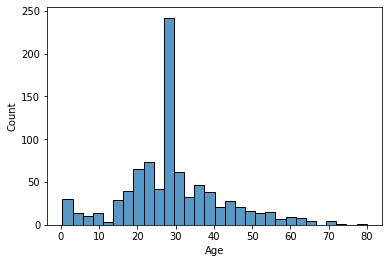

In [13]:
sns.histplot(df['Age'])

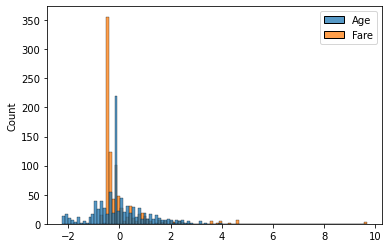

In [14]:
sns.histplot(df_s[['Age','Fare']])

In [15]:
df_s[['Age','Fare']].std()

Age     1.000562
Fare    1.000562
dtype: float64

In [16]:
df[['Age','Fare']].std()

Age     13.019697
Fare    49.693429
dtype: float64


## Min Max Scaling
Min Max Scaling scales the values between 0 to 1. 

X_scaled = (X - X.min / (X.max - X.min)

In [17]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
df_minmax=pd.DataFrame(min_max.fit_transform(df),columns=df.columns)
df_minmax.head()

Survived  Pclass       Age      Fare
0       0.0     1.0  0.271174  0.014151
1       1.0     0.0  0.472229  0.139136
2       1.0     1.0  0.321438  0.015469
3       1.0     0.0  0.434531  0.103644
4       0.0     1.0  0.434531  0.015713

Robust Scaler
It is used to scale the feature to median and quantiles Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:

IQR = 75th quantile - 25th quantile

X_scaled = (X - X.median) / IQR

0,1,2,3,4,5,6,7,8,9,10

*  9 is 90 percentile---90% of all values in this group is less than 9 

*  1 is 10 precentile---10% of all values in this group is less than 1

In [18]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
df_robust_scaler=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_robust_scaler.head()

Survived  Pclass       Age      Fare
0       0.0     0.0 -0.461538 -0.312011
1       1.0    -2.0  0.769231  2.461242
2       1.0     0.0 -0.153846 -0.282777
3       1.0    -2.0  0.538462  1.673732
4       0.0     0.0  0.538462 -0.277363

In [19]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/titanic_train.csv',usecols=['Age','Fare','Survived'])
df.head(2)

Survived   Age     Fare
0         0  22.0   7.2500
1         1  38.0  71.2833

In [20]:
df.head(2)

Survived   Age     Fare
0         0  22.0   7.2500
1         1  38.0  71.2833

In [21]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [22]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


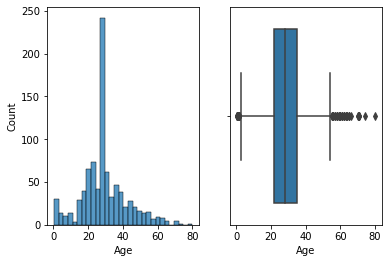

In [23]:
plt.subplot(1,2,1) # 1 row, 2 columns, 1 st index
sns.histplot(df['Age'])
plt.subplot(1,2,2)# 1 row, 2 columns, 2nd index
sns.boxplot(df['Age'])

In [24]:
import scipy.stats as stats
import pylab

In [25]:

#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

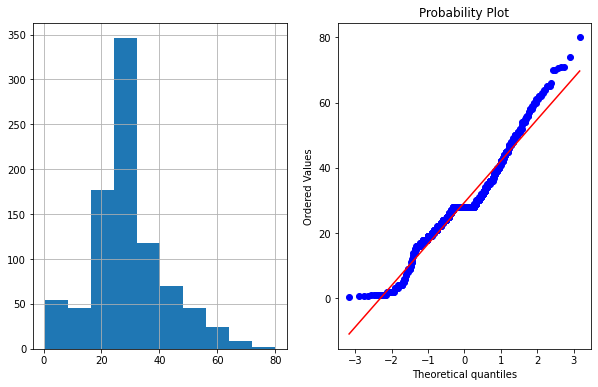

In [26]:
plot_data(df,'Age')


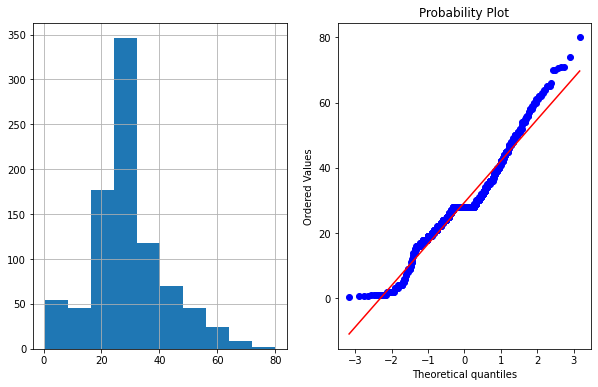

In [27]:
plot_data(df,'Age')

## Logarithmic Distribution

Age


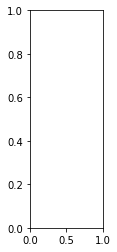

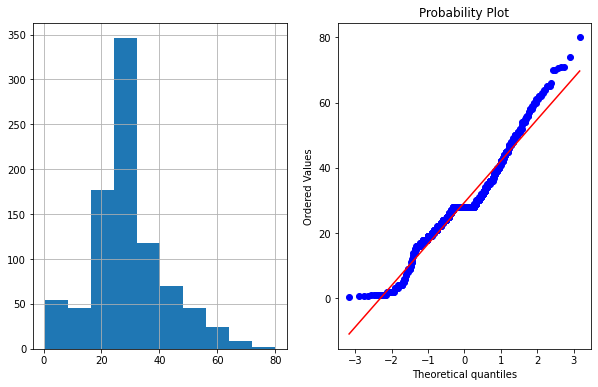

Age_log


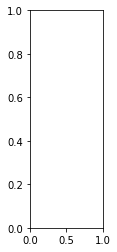

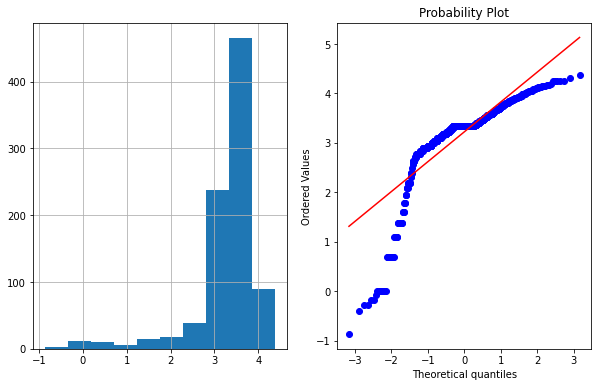

In [28]:
import numpy as np
df['Age_log']=np.log(df['Age'])
plt.subplot(1,4,1)
print('Age')
plot_data(df,'Age')
plt.subplot(1,4,3)
print('Age_log')
plot_data(df,'Age_log')
plt.show()

As evident post logarithmic transformation of Age column, its not falling on the straight line so its not normally distributed.

## Reciprocal Transformation 


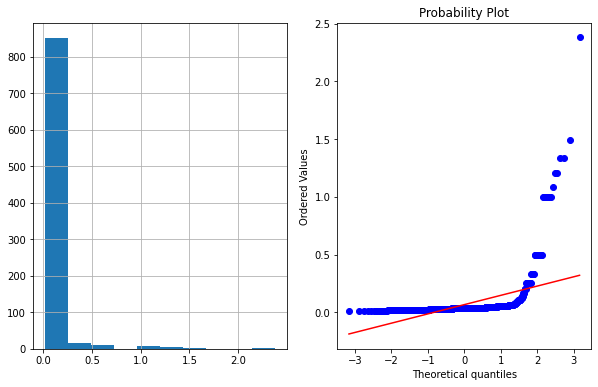

In [29]:
 df['Age_reciprocal']=1/df['Age']
plot_data(df,'Age_reciprocal')

As evident , its not falling on the line so not normally distributed

## Square Root Transformation 

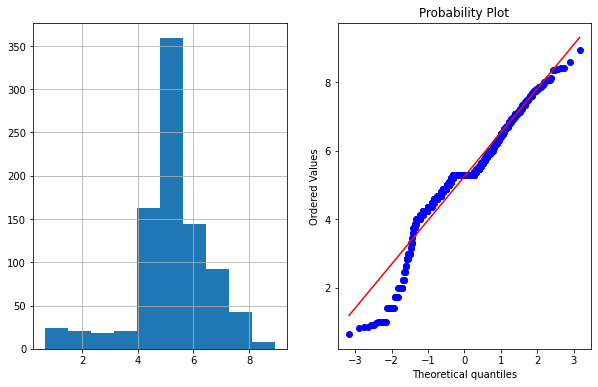

In [30]:
df['Age_sqrt']=np.sqrt(df['Age'])
plot_data(df,'Age_sqrt')

## Exponential Transformation 

In [31]:

# #### Exponential Transdormation
# df['Age_exponential']=df.Age**(1/1.2)
# plot_data(df,'Age_exponential')

## Box-Cox Transformation 

In [32]:
df['Age_boxcox'],param=stats.boxcox(df['Age'])

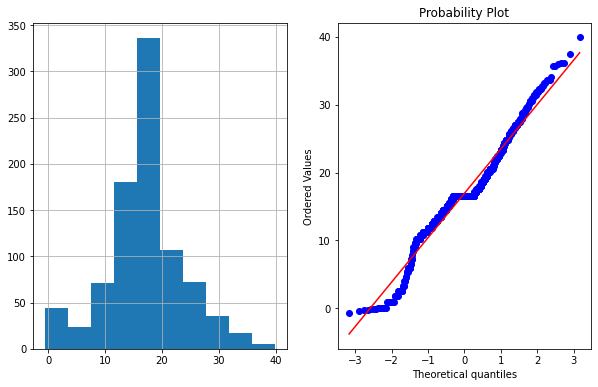

In [33]:
plot_data(df,'Age_boxcox')